In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [11]:
def concatenate(data):
    cdata = data[0]
    for i in range(1, len(data)):
        cdata = np.concatenate((cdata, data[i]), axis=1)
    return cdata

In [90]:
def clssifier(data, tail_size, eps=0.5, visual_flag=True):
    '''
    The data input should follow the Structure:
    data[index_of_traj][index_of_coord][index_of_point]
    '''
    # First Step: Take the data input, should consider the tail points
    data_tail = data[:,:,-tail_size:]
    X = concatenate(data_tail)
    # Second Step: apply DBSCAN and label all points
    clustering = DBSCAN(eps=eps, min_samples=2).fit(X.T)

    # Third Step: Assign label of points to its corresponding trajctory
    label=[]
    for i in range(1,len(X.T),tail_size): # This should be modified wrt length of lables and length of assigned dataset in DBSCAN
        label.append(clustering.labels_[i])
    counts = [label.count(i) for i in set(label)]
    print(set(label))
    print(counts)
    lgd_idx = [label.index(i) for i in set(label)]
    # Optional: Plot of the result
    if visual_flag:
        for i in lgd_idx:
            plt.plot(data[i][0],data[i][1], color="C{}".format(label[i]), label=str(label[i]))
            plt.legend()
        for i in range(len(data)):
            plt.plot(data[i][0], data[i][1], color="C{}".format(label[i]), alpha=0.2)
            
    return label

In [91]:
data = np.load('/home/ucapzwe/generate_data/matlab2py/CLIBuild/script/spiral_traj_Mconfig_2022-05-22-2/result.npy')

{0, 1, 2, 3, 4, 5}
[60, 36, 1, 1, 1, 1]


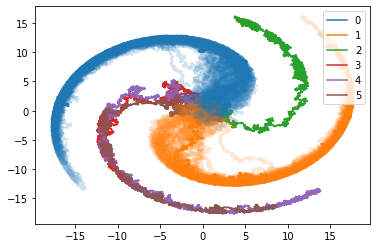

In [92]:
labels = clssifier(data,100,4.0,visual_flag=True)

In [93]:
dataz = np.load('/home/ucapzwe/generate_data/matlab2py/CLIBuild/script/zshape_traj_Mconfig_2022-05-23/result.npy')

In [94]:
dataz.shape

(100, 2, 1000)

{0, 1}
[48, 52]


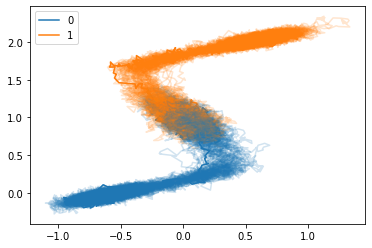

In [97]:
labelz = clssifier(dataz,10,0.5)

In [105]:
count = [labels.count(i) for i in set(labels)]

In [113]:
np.sort(np.array(set(labels)), order=np.array(count))

ValueError: Cannot specify order when the array has no fields.

In [111]:
list(set(labels))

[0, 1, 2, 3, 4, 5]

In [110]:
count

[60, 36, 1, 1, 1, 1]